In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [33]:
# Now to read in the data via read.csv 

df = pd.read_csv(r"C:\Users\Arron\Documents\movies.csv")

In [32]:
df.head()

#taking a look at the data 

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,1,52287414,4661,8,1710,89,8.1,2454,299174,3716,1986
1,6000000,1680,54,1296,4,70136369,1821,7,778,103,7.8,1605,264740,1970,1986
2,15000000,1680,54,2645,0,179800601,6203,6,1169,110,6.9,2345,236909,1852,1986
3,18500000,2062,54,1066,0,85160248,295,8,1341,137,8.4,2192,540152,1629,1986
4,9000000,2122,54,2123,1,18564613,1872,6,46,90,6.9,1139,36636,2549,1986


In [31]:
# I need to see if I have any missing data
#  looping through the data and see if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
    #there isn't. 

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [30]:
df.dtypes
#checking the data types. 

budget        int64
company       int16
country        int8
director      int16
genre          int8
gross         int64
name          int16
rating         int8
released      int16
runtime       int64
score       float64
star          int16
votes         int64
writer        int16
year          int64
dtype: object

In [29]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

df.head()
 
#cleaned data, changed interger type.

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,1,52287414,4661,8,1710,89,8.1,2454,299174,3716,1986
1,6000000,1680,54,1296,4,70136369,1821,7,778,103,7.8,1605,264740,1970,1986
2,15000000,1680,54,2645,0,179800601,6203,6,1169,110,6.9,2345,236909,1852,1986
3,18500000,2062,54,1066,0,85160248,295,8,1341,137,8.4,2192,540152,1629,1986
4,9000000,2122,54,2123,1,18564613,1872,6,46,90,6.9,1139,36636,2549,1986


In [28]:
df.sort_values(by=["gross"],inplace=False, ascending=False).head()




#changed order of movies ascending by gross income. 

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,1428,54,1037,0,936662225,4679,7,1382,136,8.1,475,687192,2356,2015
5061,237000000,2062,53,1066,0,760507625,501,7,1380,162,7.8,2084,954412,1629,2009
2420,200000000,2062,54,1066,6,658672302,6177,7,1454,194,7.8,1444,862554,1629,1997
6391,150000000,2085,54,466,0,652270625,2721,7,869,124,7.0,404,469200,3310,2015
5723,220000000,1491,54,1412,0,623357910,4995,7,245,143,8.1,2001,1064633,2145,2012


In [58]:
pd.set_option("display.max_rows",None)

#Dropping any duplicates 

bbbb=df["company"].drop_duplicates().sort_values






<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

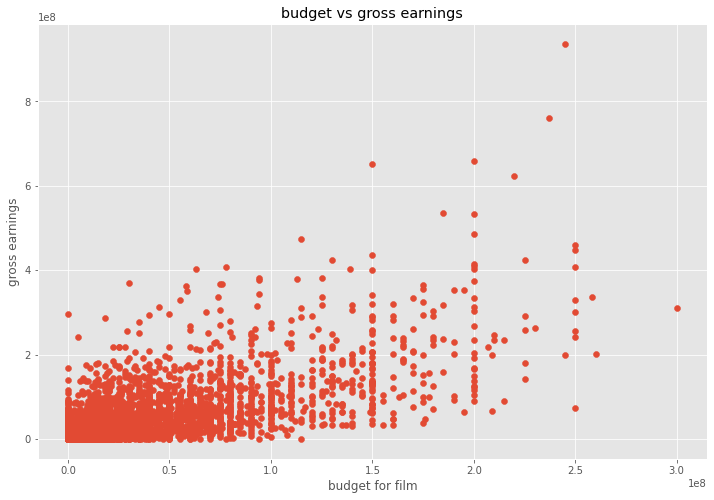

In [9]:
plt.scatter(x=df["budget"], y=df["gross"])

plt.title("budget vs gross earnings")

plt.xlabel("budget for film")

plt.ylabel("gross earnings")

plt.title 



<AxesSubplot:xlabel='budget', ylabel='gross'>

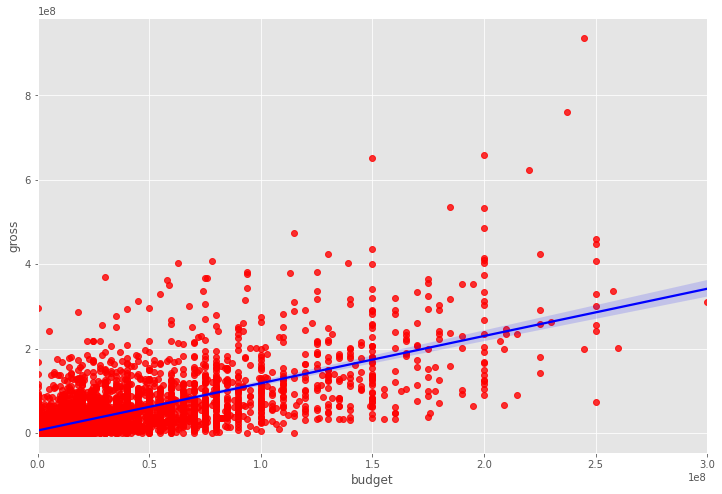

In [17]:
sns.regplot(x="budget", y="gross", data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

#plot using seaborn to see correlation  between gross profit and high budget. 

In [21]:
#To check cororlation between budget and gross. 
#pearson 

df.corr(method="pearson") 


,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [32]:
# ^^^ As you can see, there is a high corolation between gross revenue and magnitude of the budget at 0.712





Text(87.0, 0.5, 'movie features')

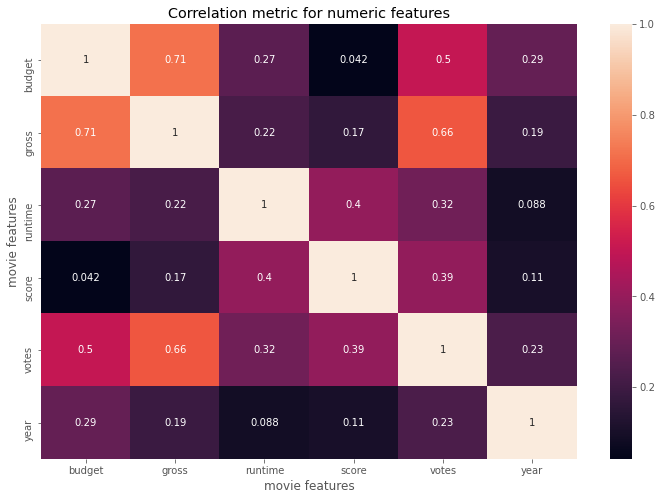

In [34]:
correlation_matrix= df.corr(method="pearson") 

sns.heatmap(correlation_matrix, annot =True )

plt.title("Correlation metric for numeric features")

plt.xlabel("movie features")

plt.ylabel("movie features")


#visualisation of the pearson correlaiton data. 

In [49]:
df.head()

# when dealing with the company for example, you can't covert the name of company into the graph because this feature 
#only deals with numbers. 

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22/08/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11/06/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16/05/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18/07/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01/08/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [17]:

    
df_numerized=df
    
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        

df_numerized.head()
    

#every category has now been nurmerized.
        
        


    

    
        
        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,1,52287414,4661,8,1710,89,8.1,2454,299174,3716,1986
1,6000000,1680,54,1296,4,70136369,1821,7,778,103,7.8,1605,264740,1970,1986
2,15000000,1680,54,2645,0,179800601,6203,6,1169,110,6.9,2345,236909,1852,1986
3,18500000,2062,54,1066,0,85160248,295,8,1341,137,8.4,2192,540152,1629,1986
4,9000000,2122,54,2123,1,18564613,1872,6,46,90,6.9,1139,36636,2549,1986


Text(87.0, 0.5, 'movie features')

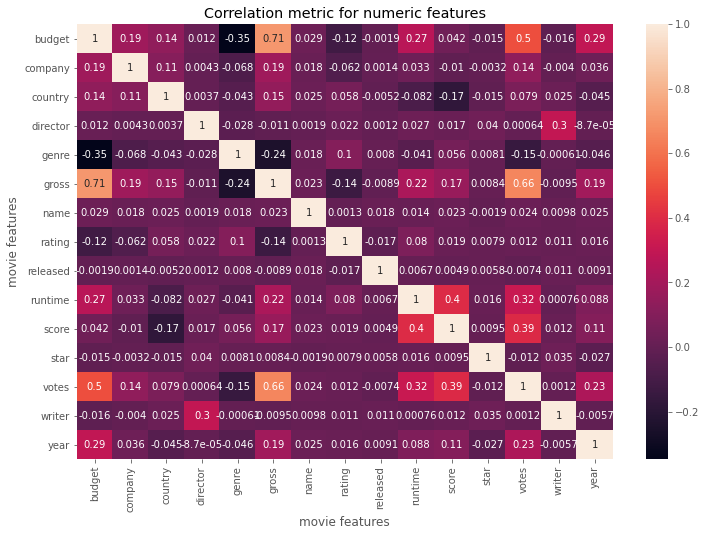

In [51]:
correlation_matrix= df_numerized.corr(method="pearson") 

sns.heatmap(correlation_matrix, annot =True )

plt.title("Correlation metric for numeric features")

plt.xlabel("movie features")

plt.ylabel("movie features")

In [64]:
#alot going on in this graph, need to make it even more clear 

Correlation_mat= df_numerized.corr()
corr_pairs=Correlation_mat.unstack()

corr_pairs
      
                

budget    budget      1.000000
          company     0.187205
          country     0.137635
          director    0.011602
          genre      -0.346794
          gross       0.712196
          name        0.028712
          rating     -0.119660
          released   -0.001867
          runtime     0.268226
          score       0.042145
          star       -0.015062
          votes       0.503924
          writer     -0.015611
          year        0.291009
company   budget      0.187205
          company     1.000000
          country     0.107950
          director    0.004320
          genre      -0.068330
          gross       0.187220
          name        0.018098
          rating     -0.062250
          released    0.001410
          runtime     0.033058
          score      -0.010426
          star       -0.003160
          votes       0.138662
          writer     -0.004032
          year        0.036272
country   budget      0.137635
          company     0.107950
        

In [68]:
sorted_pairs=corr_pairs.sort_values()

sorted_pairs


budget    genre      -0.346794
genre     budget     -0.346794
          gross      -0.242676
gross     genre      -0.242676
score     country    -0.174414
country   score      -0.174414
votes     genre      -0.150519
genre     votes      -0.150519
gross     rating     -0.135538
rating    gross      -0.135538
          budget     -0.119660
budget    rating     -0.119660
runtime   country    -0.081796
country   runtime    -0.081796
company   genre      -0.068330
genre     company    -0.068330
company   rating     -0.062250
rating    company    -0.062250
year      genre      -0.046259
genre     year       -0.046259
country   year       -0.045204
year      country    -0.045204
genre     country    -0.042793
country   genre      -0.042793
genre     runtime    -0.041357
runtime   genre      -0.041357
genre     director   -0.027669
director  genre      -0.027669
star      year       -0.026682
year      star       -0.026682
rating    released   -0.016739
released  rating     -0.016739
writer  

In [ ]:
#votes and budget have the highest Correlation with gross proift. 